## Implement a KNN model to classify the animals in to categorie


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
zoo_df = pd.read_csv(r"Zoo.csv")

In [3]:
zoo_df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
# Drpping the animal name column
zoo_columns = ["hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type"]
zoo_animal_df = zoo_df[zoo_columns]

In [6]:
zoo_animal_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
zoo_animal_df.shape

(101, 17)

In [9]:
# Checking datatypes
zoo_animal_df.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

In [12]:
# Finding Missing Values
nan_bool_df = zoo_animal_df.isna()

# Use sum() to count the number of True values (NaN) in each column
nan_count_per_column = nan_bool_df.sum()

# If you want the total count of NaN values in the entire DataFrame, you can sum the nan_count_per_column
total_nan_count = nan_count_per_column.sum()

nan_count_per_column

total_nan_count

0

In [13]:
zoo_animal_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# Outliers detection

### Using Box Plot to detect the outliers 

Indices of outliers from the box plots:
[2, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 24, 26, 27, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 46, 51, 53, 56, 57, 58, 59, 60, 61, 62, 65, 66, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 92, 93, 95, 97, 99, 100]
68


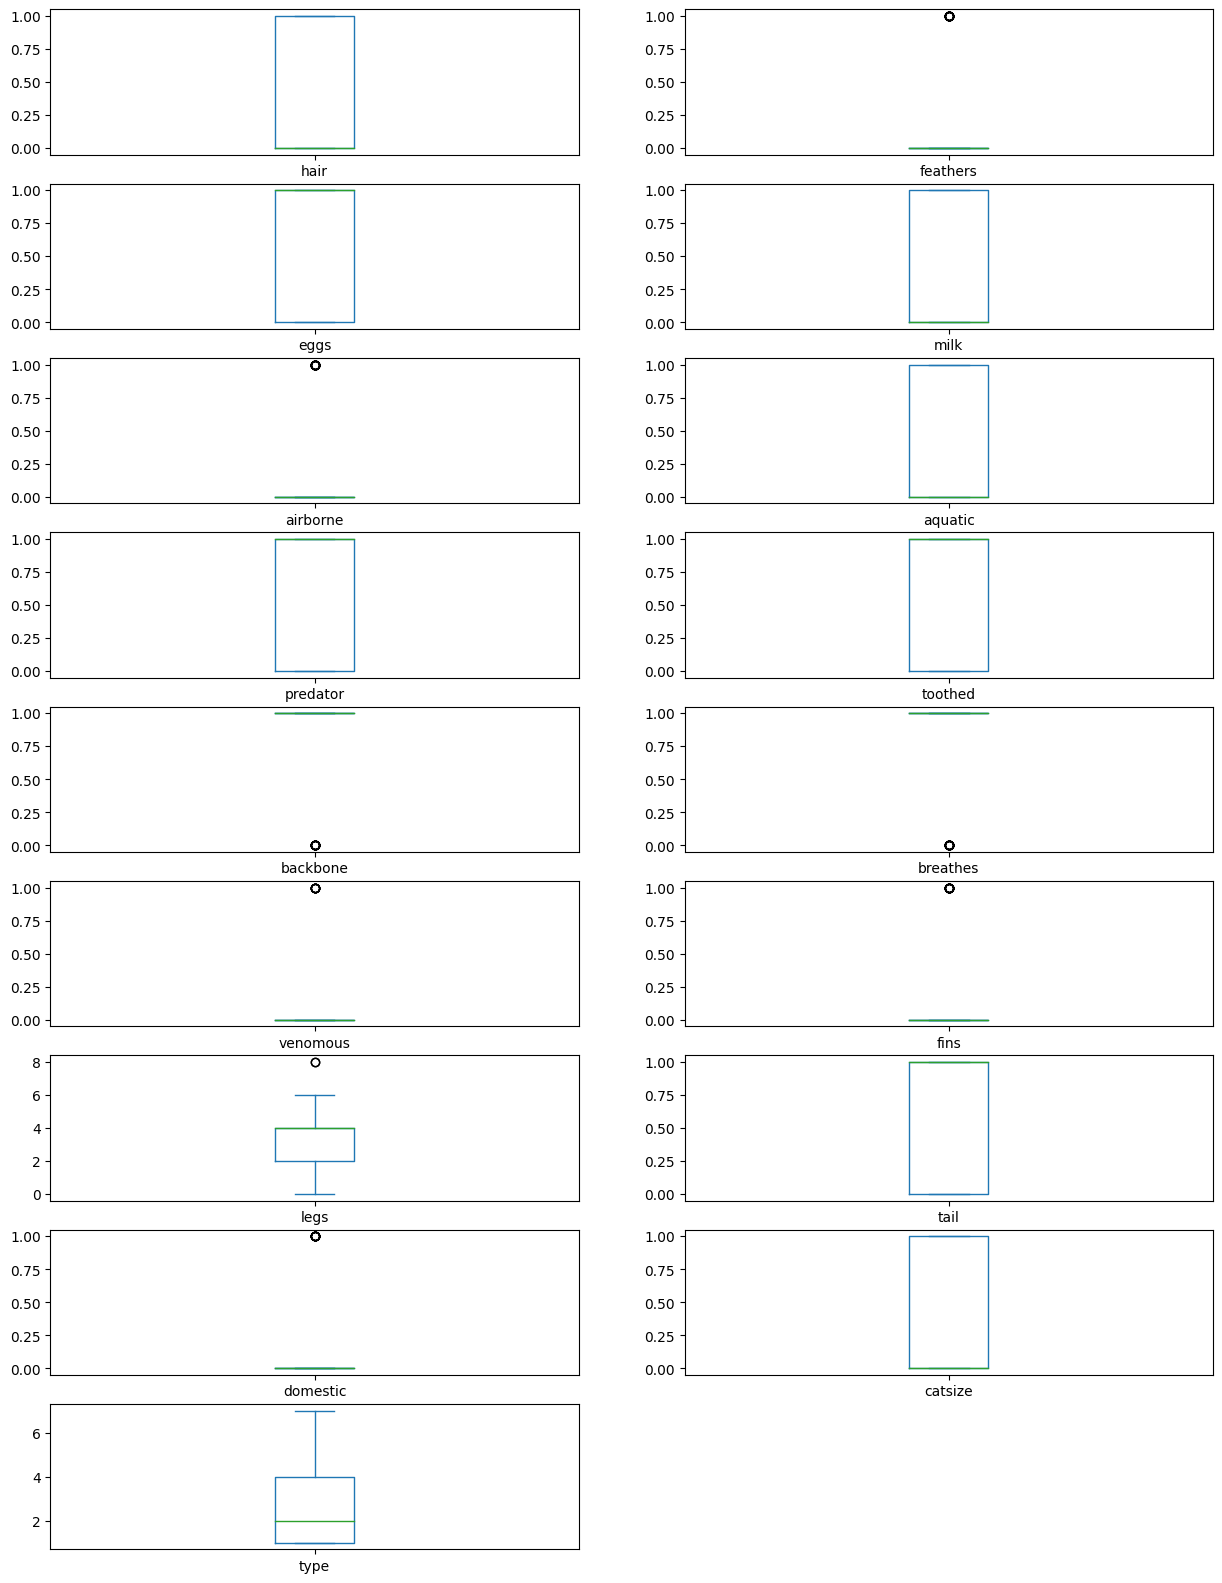

In [14]:
# Box plot find the outliers 

box_plot = zoo_animal_df.plot(kind="box",subplots=True,layout=(9,2),figsize=(15,20));

# Calculate the IQR for each variable
Q1 = zoo_animal_df.quantile(0.25)
Q3 = zoo_animal_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Get the indices of the outliers
outlier_indices = []

for col, ax in zip(zoo_animal_df.columns, box_plot):
    outliers = ((zoo_animal_df[col] < (Q1[col] - IQR_multiplier * IQR[col])) | (zoo_animal_df[col] > (Q3[col] + IQR_multiplier * IQR[col])))
    col_outlier_indices = zoo_animal_df.index[outliers]
    outlier_indices.extend(col_outlier_indices)

outlier_indices = list(set(outlier_indices))  # Remove duplicate indices

# Display the outlier indices
print("Indices of outliers from the box plots:")
print(outlier_indices)
print(len(outlier_indices))

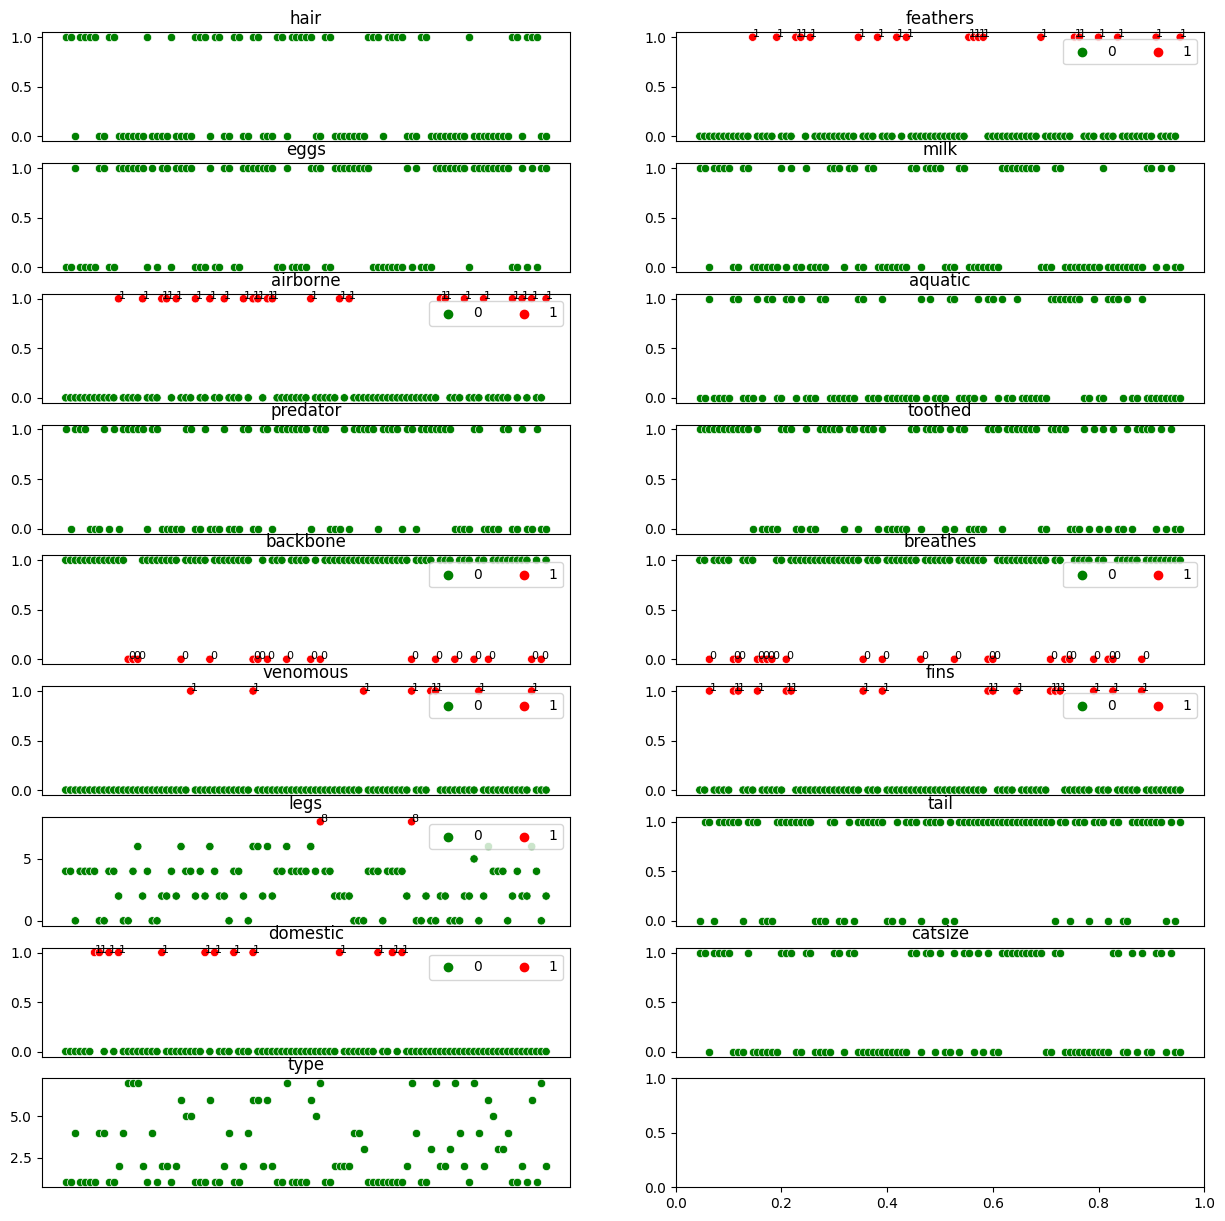

Row indices of potential outliers:
Int64Index([  2,   6,   7,   8,   9,  11,  12,  13,  14,  15,  16,  18,  19,
             20,  21,  23,  24,  26,  27,  29,  30,  31,  33,  34,  35,  37,
             38,  39,  40,  41,  42,  43,  46,  51,  53,  56,  57,  58,  59,
             60,  61,  62,  65,  66,  68,  70,  71,  72,  73,  74,  75,  76,
             77,  78,  79,  81,  82,  83,  85,  86,  87,  88,  92,  93,  95,
             97,  99, 100],
           dtype='int64')


In [15]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr_outlier(x,factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - factor * iqr
    max_ = q3 + factor * iqr
    result_ = pd.Series([0] * len(x))
    result_[((x < min_) | (x > max_))] = 1
    return result_
#SCATTER PLOTS HIGHLIGHTING OUTLIERS CALCULATED USING IQR METHOD
fig, ax = plt.subplots(9, 2, figsize=(15, 15))
row = col = 0
for n,i in enumerate(zoo_animal_df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = iqr_outlier(zoo_animal_df[i], 1.5)
   
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(zoo_animal_df[i])), y = zoo_animal_df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(zoo_animal_df[i])), y = zoo_animal_df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(zoo_animal_df[i]))[outliers == 1], zoo_animal_df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1
plt.show()

# Calculate the IQR for each variable
Q1 = zoo_animal_df.quantile(0.25)
Q3 = zoo_animal_df.quantile(0.75)
IQR = Q3 - Q1

# Set the IQR multiplier for identifying potential outliers
IQR_multiplier = 1.5  # Adjust as needed

# Identify potential outliers based on the IQR method
outliers = ((zoo_animal_df < (Q1 - IQR_multiplier * IQR)) | (zoo_animal_df > (Q3 + IQR_multiplier * IQR)))

# Get the row indices of potential outliers
row_indices = zoo_animal_df.index[outliers.any(axis=1)]

# Print the row indices of potential outliers
print("Row indices of potential outliers:")
print(row_indices)

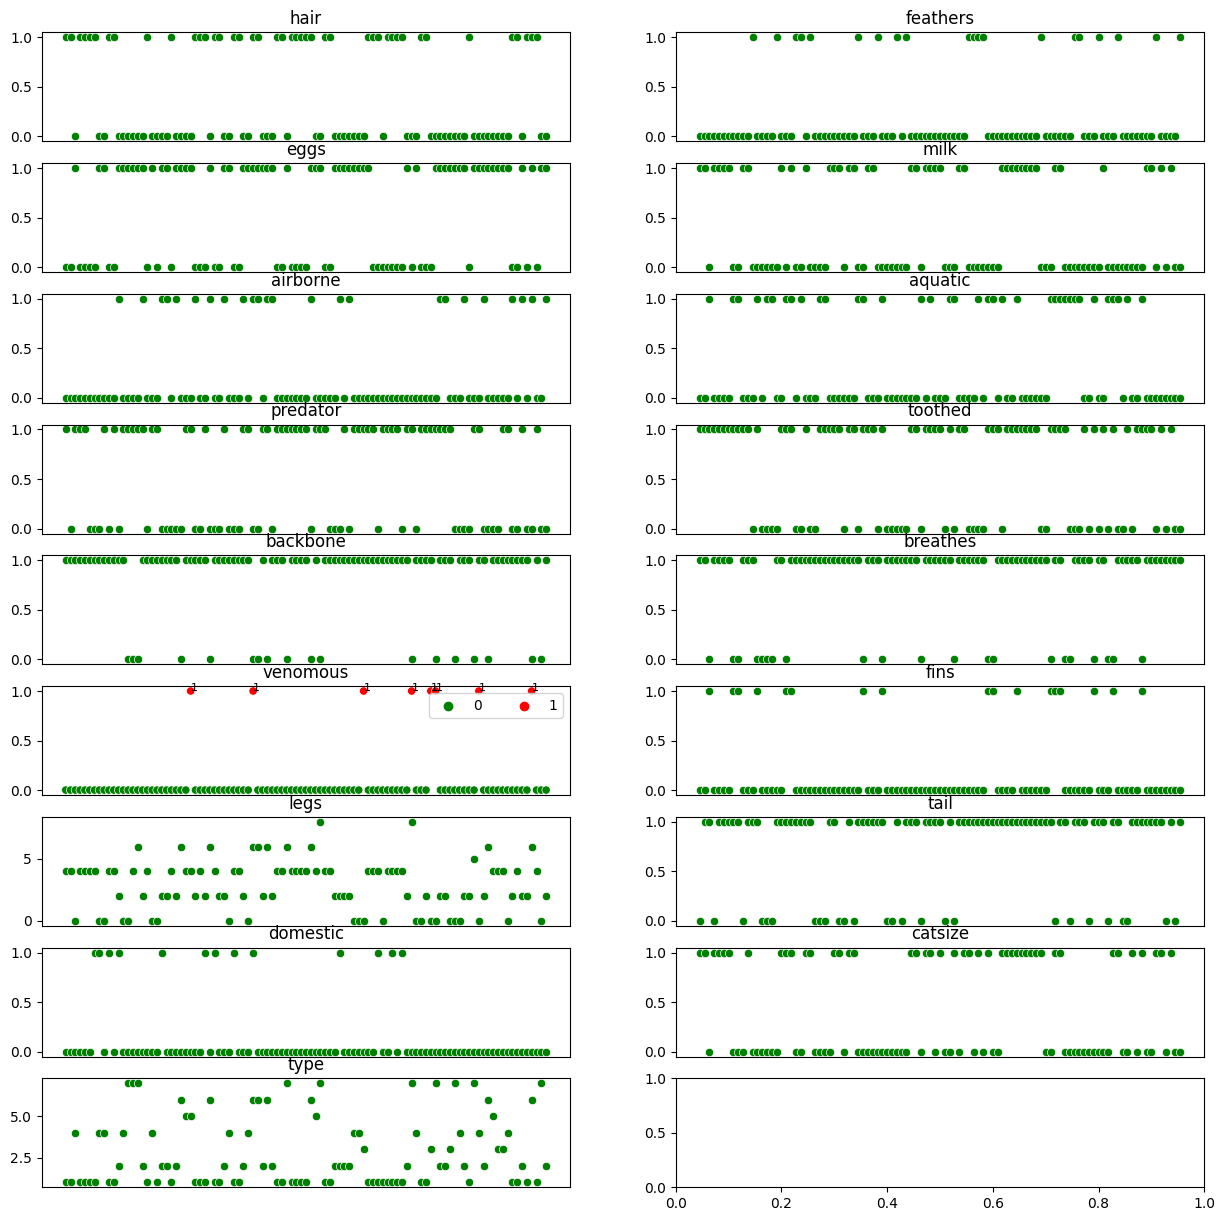

In [16]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(x,lb,ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x))
    result_[((zscore < lb) | (zscore > ub))] = 1
    return result_
#PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
fig, ax = plt.subplots(9, 2, figsize=(15, 15))
row = col = 0
for n,i in enumerate(zoo_animal_df.columns):
    if (n % 2 == 0) & (n > 0):
        row += 1
        col = 0
    outliers = zscore_outlier(zoo_animal_df[i], -3, 3)
   
    if sum(outliers) == 0:
        sns.scatterplot(x = np.arange(len(zoo_animal_df[i])), y = zoo_animal_df[i], ax = ax[row, col], legend=False, color = 'green')
    else:
        sns.scatterplot(x = np.arange(len(zoo_animal_df[i])), y = zoo_animal_df[i], ax = ax[row, col], hue = outliers, palette = ['green','red'])
    for x,y in zip(np.arange(len(zoo_animal_df[i]))[outliers == 1], zoo_animal_df[i][outliers == 1]):
        ax[row,col].text(x = x, y = y, s = y, fontsize = 8)
    ax[row,col].set_ylabel("")
    ax[row,col].set_title(i)
    ax[row,col].xaxis.set_visible(False)
    if sum(outliers) > 0:
        ax[row,col].legend(ncol=2)
    col += 1

plt.show()


### Even though the outlier methods shows so many records as outliers, but none of them are out of range so none are found to be outlier.

In [17]:
# Correlation matrix to check the multi collinearity of the features
zoo_animal_df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


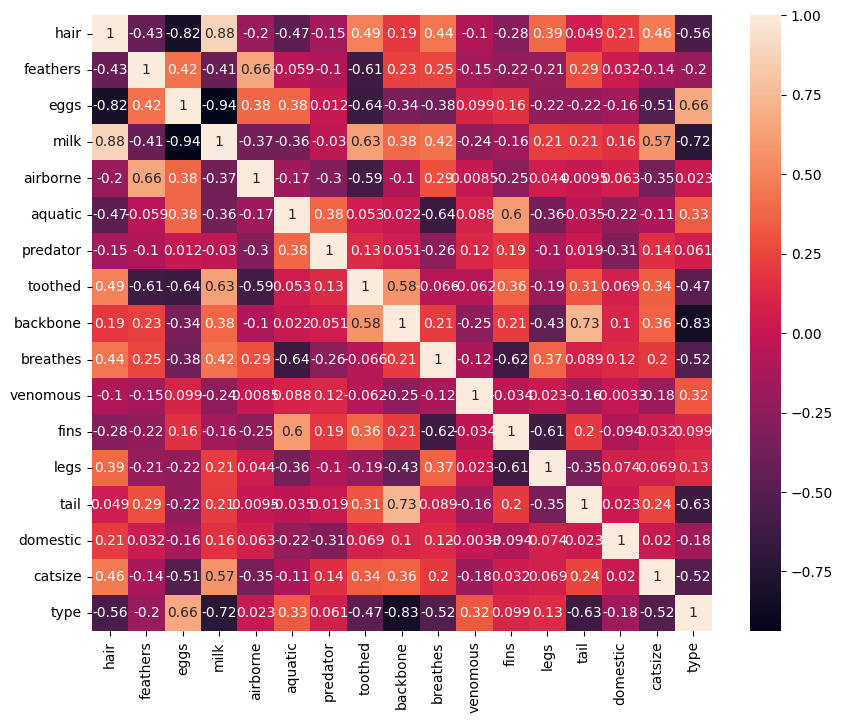

In [18]:
plt.figure(figsize=(10, 8))  # Adjust width and height as needed
sns.heatmap(zoo_animal_df.corr(), annot=True)
plt.show()

### None of the value is near or equal to 1 or -1 for the continuous features. Hence no multicolinearity present.

In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_results = calculate_vif(zoo_animal_df)  
print("VIF Results:")
print(vif_results)

VIF Results:
     feature         VIF
0       hair   14.529634
1   feathers   15.456918
2       eggs   35.427888
3       milk   30.781036
4   airborne    3.966279
5    aquatic    4.412490
6   predator    3.252198
7    toothed   51.024044
8   backbone  118.840166
9   breathes   16.090747
10  venomous    1.765375
11      fins    4.266037
12      legs    8.659233
13      tail   10.486559
14  domestic    1.407885
15   catsize    3.500608
16      type   23.282649


### VIF value for all the features is very low. Hence all the variables are significant and there is no presence of multicollinearity.
### From both the correlation matrix and the VIF value show that none of the feature depend on each other. Hence there is no multicollinearity present in the dataset.

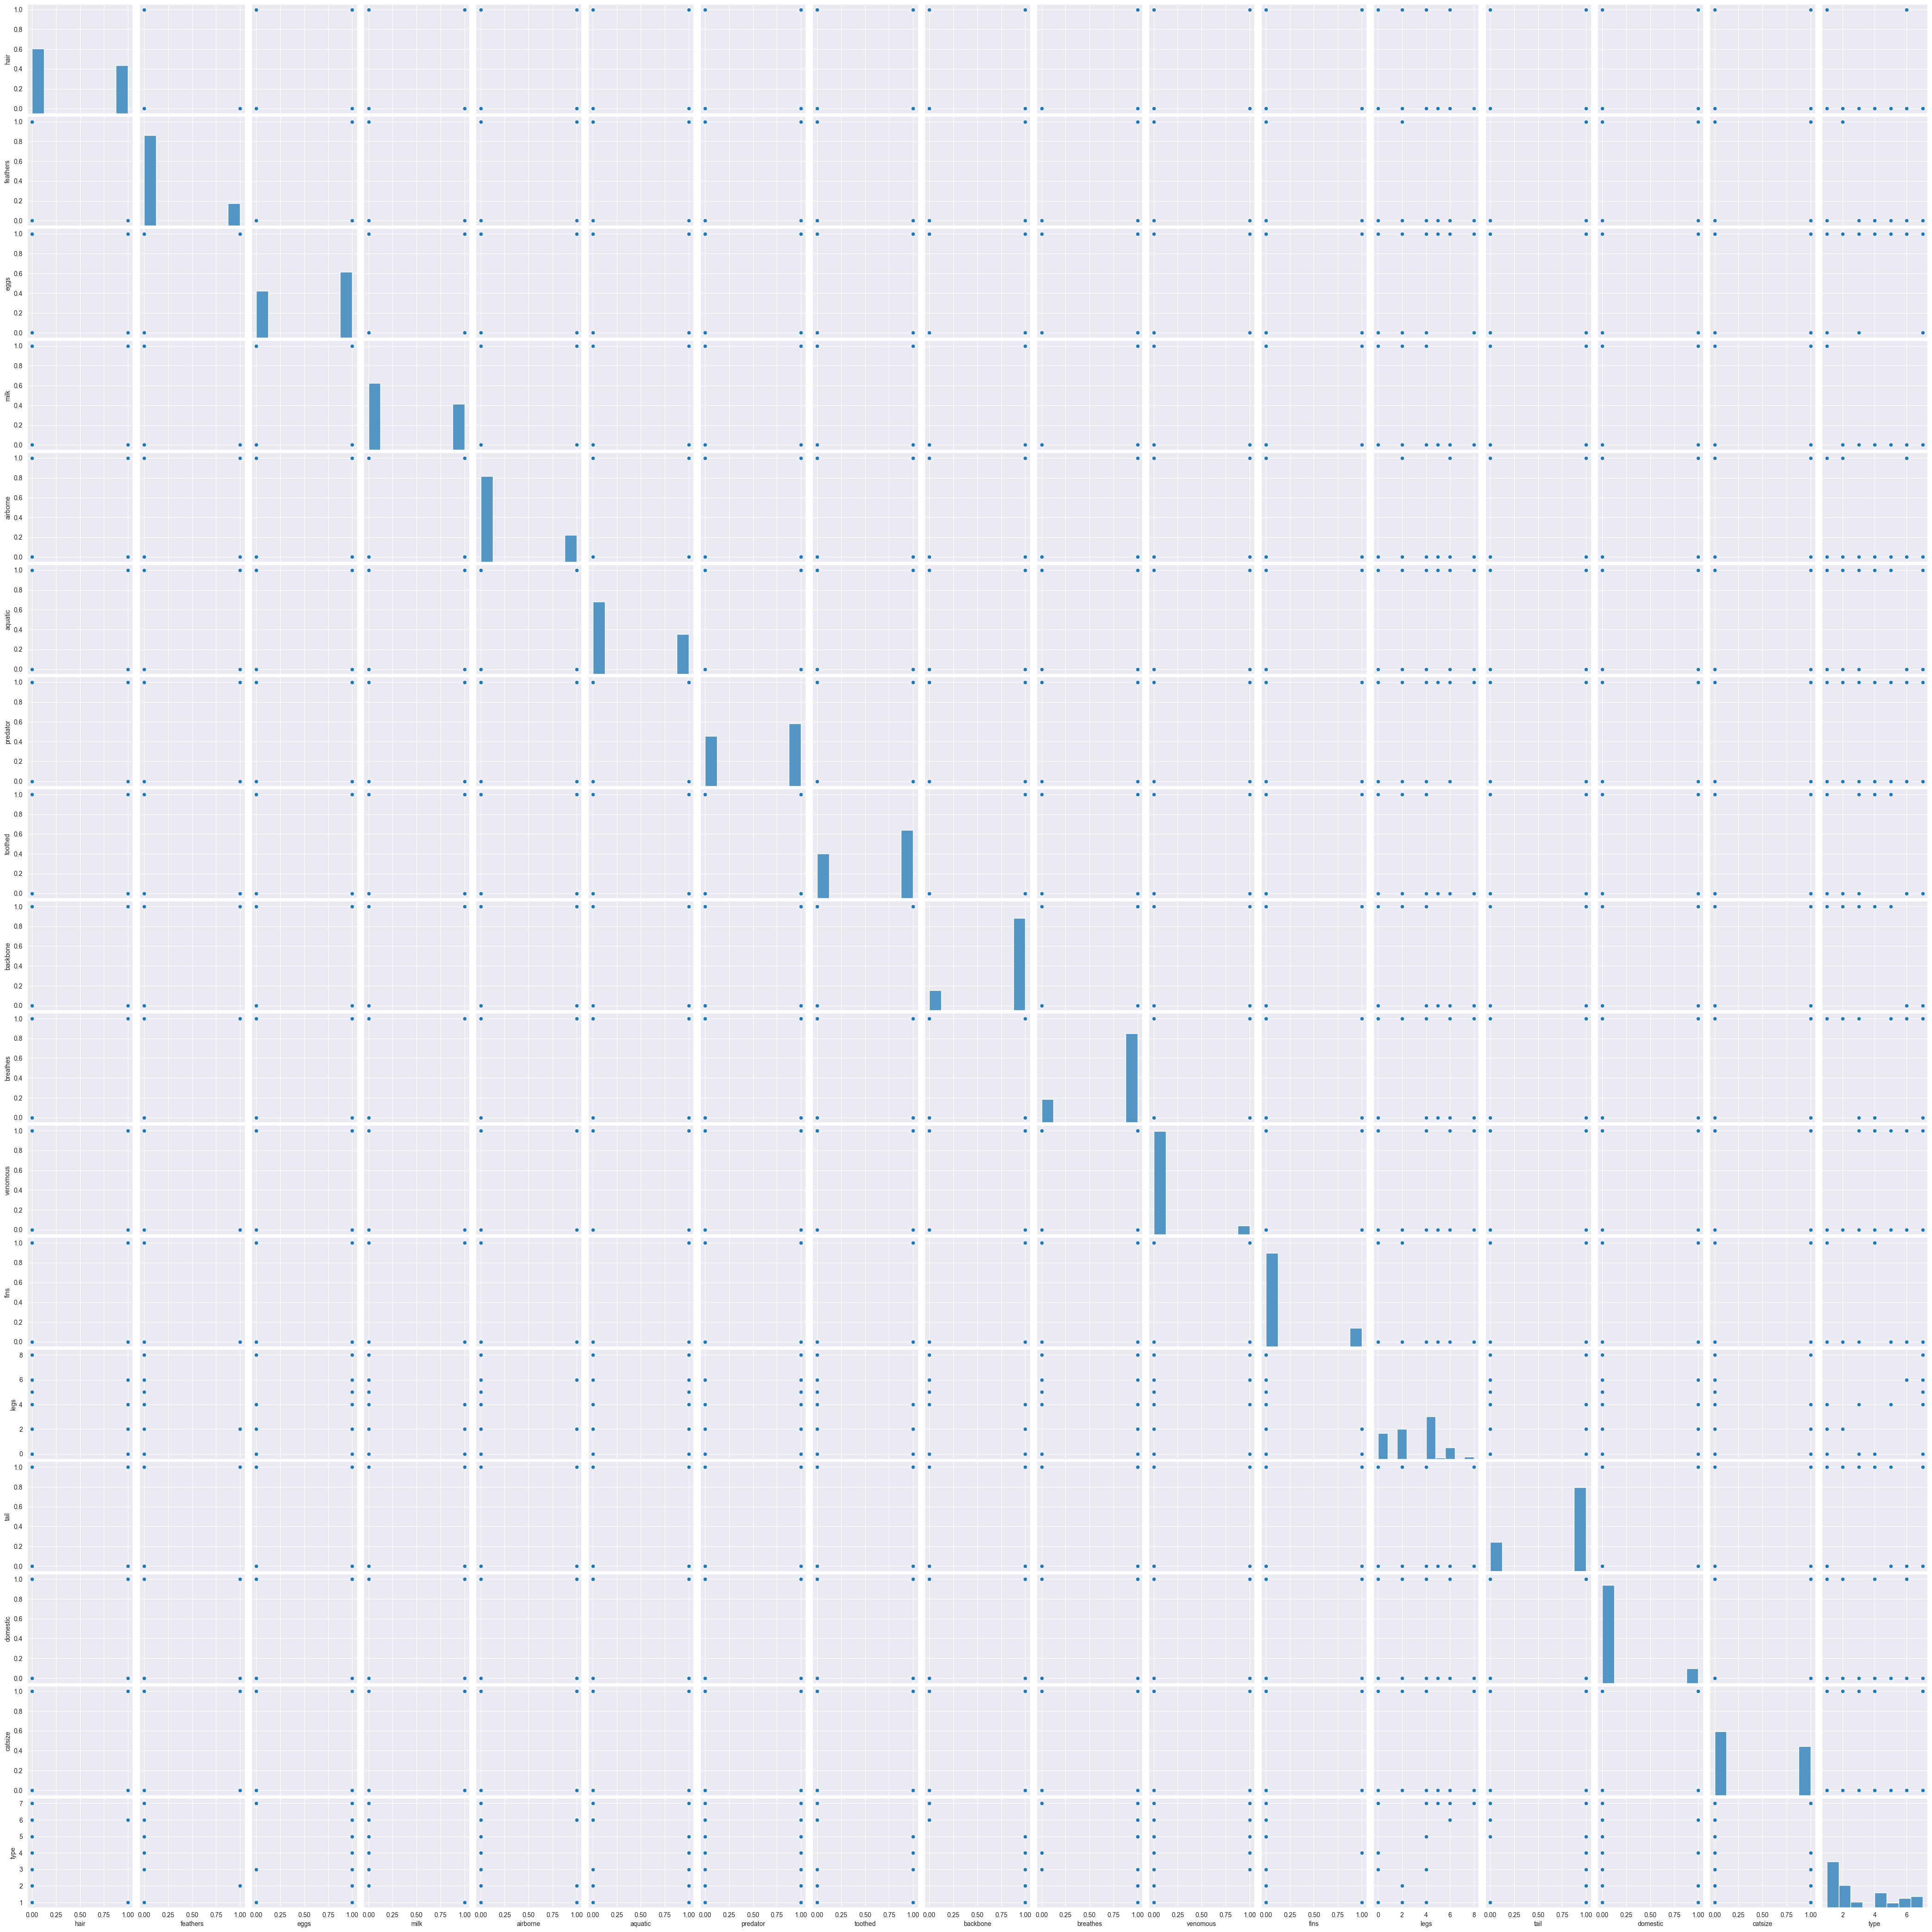

In [20]:
# Drawing Histogram to check the distribution of the data.
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(zoo_animal_df)

### Most of the histogram shows that the features are not normally distributed.

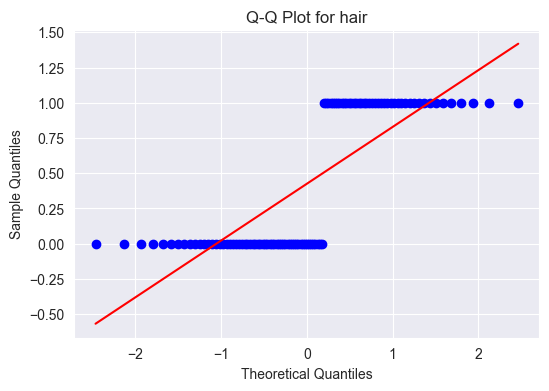

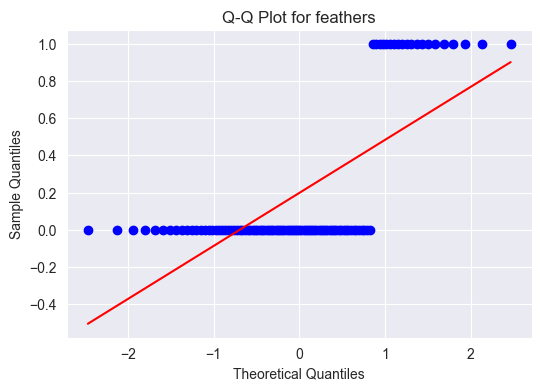

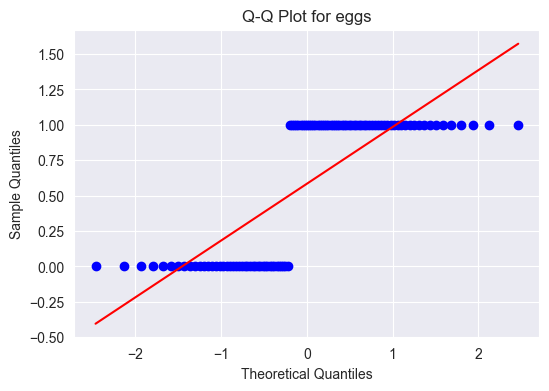

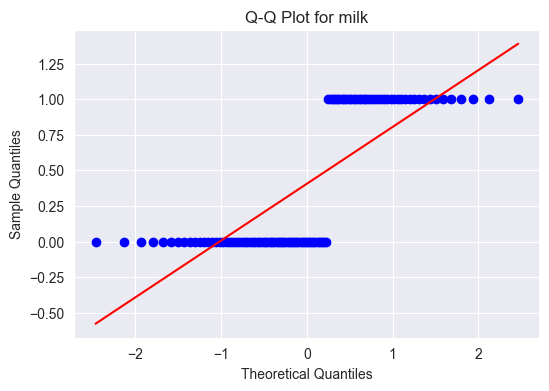

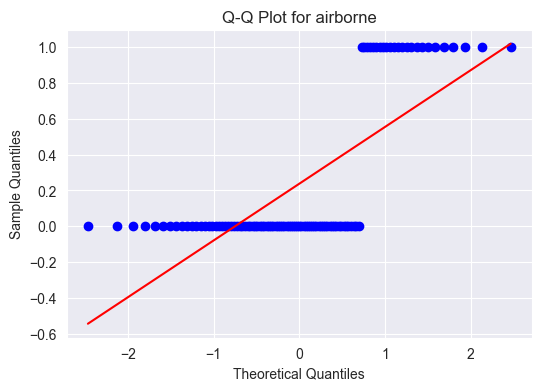

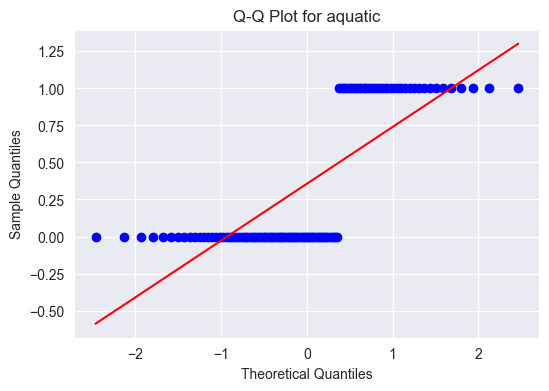

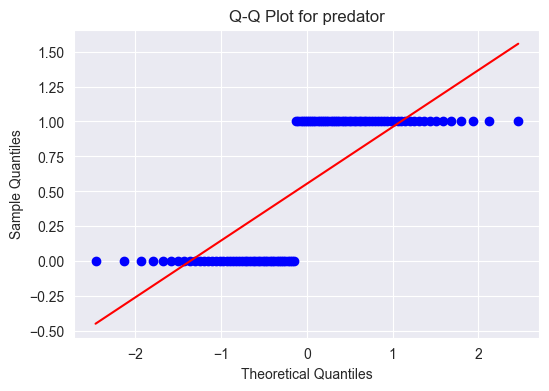

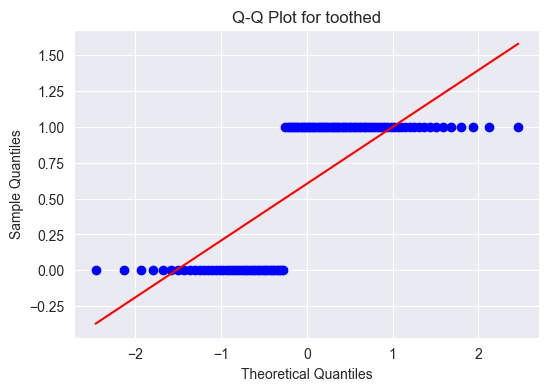

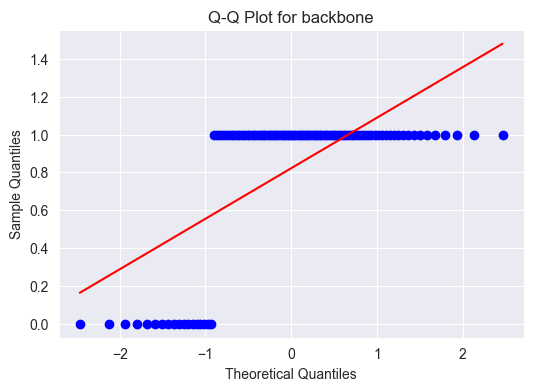

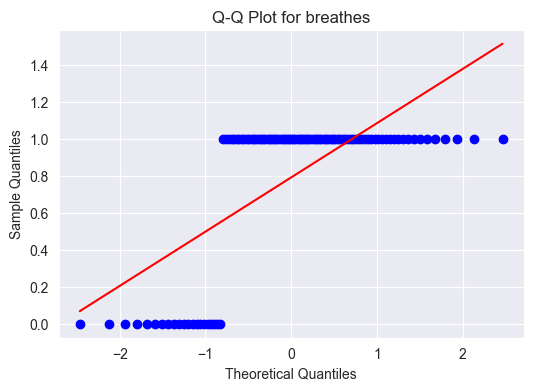

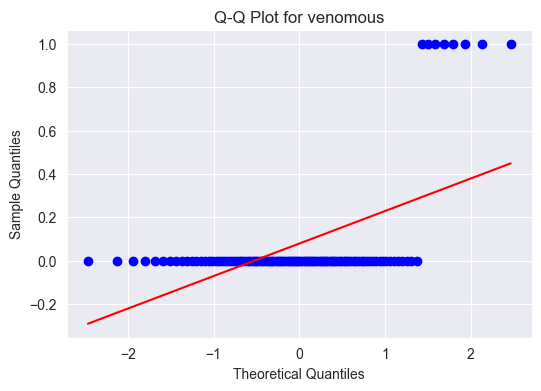

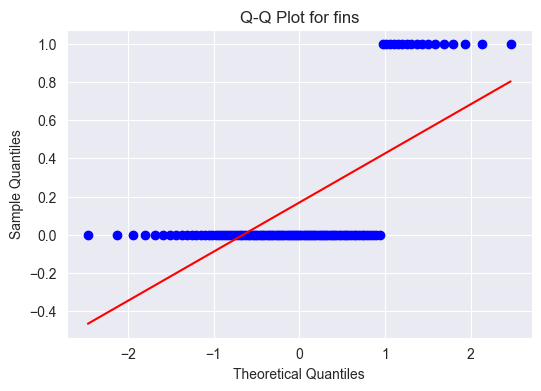

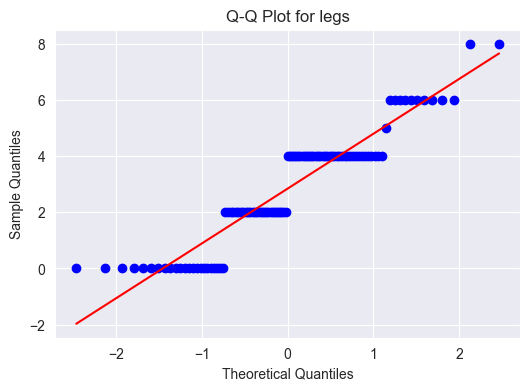

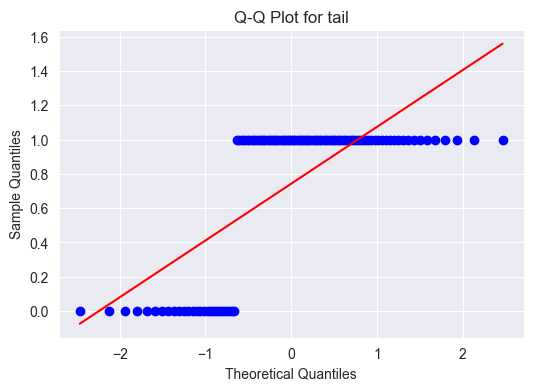

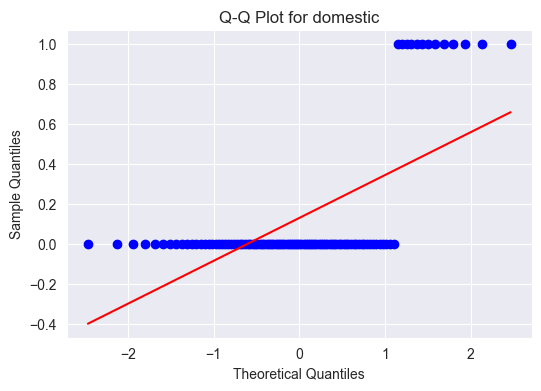

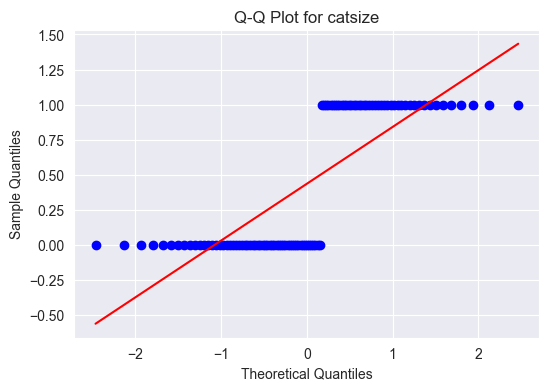

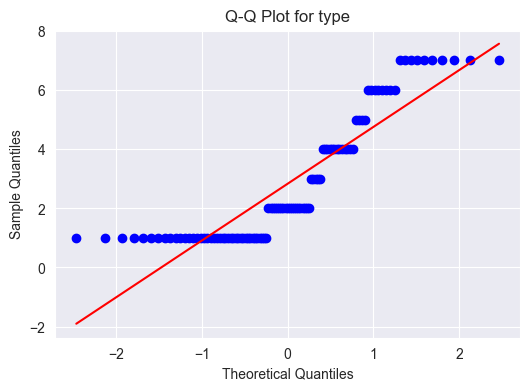

In [21]:
# Using Q-Q plot for checking the data distribution
# Create Q-Q plots for each variable in separate graphs
for col in zoo_animal_df.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(zoo_animal_df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.show()

### Most of the Q-Q plot shows that features are not normally distributed.
### But most of the features are categorical values and all of them are encoded. Hence no need of standardization or normalization. 

# Model building

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X1 = zoo_animal_df.drop("type", axis=1)
y1 = zoo_animal_df["type"]

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Create a KNN classifier
k = 3  # You can choose the number of neighbors (k) based on your problem
model1 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
model1.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



### Accuracy for different K values 

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your dataset and standardized it as shown in your code

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['K', 'Accuracy'])

# Define a range of K values to experiment with
k_values = list(range(1, 11))  # You can adjust the range as needed

# Iterate over the K values
for k in k_values:
    # Create and train a KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append K and accuracy to the results DataFrame
    results_df = results_df.append({'K': k, 'Accuracy': accuracy}, ignore_index=True)

# Display the results DataFrame
print(results_df)


      K  Accuracy
0   1.0  1.000000
1   2.0  0.967742
2   3.0  0.935484
3   4.0  0.903226
4   5.0  0.870968
5   6.0  0.870968
6   7.0  0.806452
7   8.0  0.806452
8   9.0  0.774194
9  10.0  0.709677


### Accuracy for any model cannot be 100%. So k=2 is the optimized values. 

### K - fold cross validation.

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into features (X) and target (y)
X2 = zoo_animal_df.drop("type", axis=1)
y2 = zoo_animal_df["type"]

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Define a range of k values to test
k_values = [1, 2, 3, 4, 5, 6, 8, 7, 9]

# Initialize an empty dictionary to store results for each k
results = {}

# Perform K-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    results[k] = scores.mean()

# Select the best k based on cross-validation results
best_k = max(results, key=results.get)

# Train the final model with the best k on the entire training dataset
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

# Evaluate the final model on the testing dataset
final_accuracy = final_knn.score(X_test, y_test)

In [34]:
results

{1: 0.975,
 2: 0.9375,
 3: 0.9,
 4: 0.8625,
 5: 0.8625,
 6: 0.8125,
 8: 0.8,
 7: 0.825,
 9: 0.8}

In [35]:
final_accuracy

1.0

In [36]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Create a KNN classifier
k = 1  # You can choose the number of neighbors (k) based on your problem
model1 = KNeighborsClassifier(n_neighbors=k)

# Perform k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(model1, X1, y1, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_num, score in enumerate(scores, start=1):
    print(f"Fold {fold_num}: Accuracy = {score:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = scores.mean()
print(f"Average Accuracy: {average_accuracy:.2f}")

Fold 1: Accuracy = 1.00
Fold 2: Accuracy = 0.95
Fold 3: Accuracy = 0.95
Fold 4: Accuracy = 1.00
Fold 5: Accuracy = 0.95
Average Accuracy: 0.97


### From the k-fold cross validation and train test split we can conclude that there is no over fitting issue.

# Final Model

In [42]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features (X) and target (y)
X3 = zoo_animal_df.drop("type", axis=1)
y3 = zoo_animal_df["type"]

# Split the dataset into a training set and a testing set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Create a KNN classifier
k = 2  # You can choose the number of neighbors (k) based on your problem
final_model = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
final_model.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred1 = final_model.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report (includes precision, recall, F1-score for each class)
class_report = classification_report(y_test1, y_pred1)
print("Classification Report:\n", class_report)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.95      0.96        31
weighted avg       0.97      0.97      0.97        31



### Confusion matrix for model accuracy.

In [43]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1,y_pred1)
print(confusion_matrix)

[[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  2]]


### Classification report for model performance

In [44]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.97        31
   macro avg       0.98      0.95      0.96        31
weighted avg       0.97      0.97      0.97        31

